In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
BASE_DIR=os.path.dirname(os.getcwd())
import pandas as pd
import sys
sys.path.append(BASE_DIR)

from vae.utils.modelIO import save_model, load_model, load_metadata
from notebooks.utils import PlotParams

In [2]:
plotter = PlotParams()
plotter.set_params()
FIG_DIR = os.path.join(os.pardir, 'figs')
RES_DIR = os.path.join(os.pardir, 'results')

In [3]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model_names1 = ['mnist_gjs-'+str(a) for a in alphas]
model_names2 = ['alpha_gjs-'+str(a) for a in alphas]
print(model_names1)
print(model_names2)
n = len(model_names1)
print(n)

['mnist_gjs-0.1', 'mnist_gjs-0.2', 'mnist_gjs-0.3', 'mnist_gjs-0.4', 'mnist_gjs-0.5', 'mnist_gjs-0.6', 'mnist_gjs-0.7', 'mnist_gjs-0.8', 'mnist_gjs-0.9']
['alpha_gjs-0.1', 'alpha_gjs-0.2', 'alpha_gjs-0.3', 'alpha_gjs-0.4', 'alpha_gjs-0.5', 'alpha_gjs-0.6', 'alpha_gjs-0.7', 'alpha_gjs-0.8', 'alpha_gjs-0.9']
9


In [4]:
test_dict1 = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names1)}
test_dict2 = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names2)}

In [5]:
test_recon1 = np.zeros(n)
test_recon2 = np.zeros(n)
for i, a in enumerate(alphas):
    test_recon1[i] = test_dict1[a]['recon_loss']
    test_recon2[i] = test_dict2[a]['recon_loss']

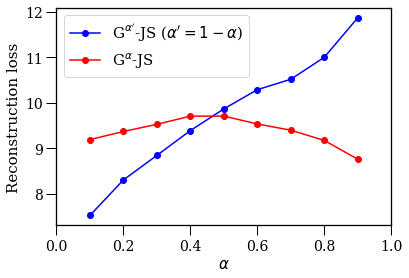

In [6]:
plt.plot(alphas, test_recon1, 'bo-', label=r"G$^{\alpha'}$-JS ($\alpha'=1-\alpha$)")
plt.plot(alphas, test_recon2, 'ro-', label=r'G$^{\alpha}$-JS')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Reconstruction loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'gjs_alpha_losses.pdf'), bbox_inches='tight')

In [7]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model_names1 = ['mnist_dgjs-'+str(a) for a in alphas]
model_names2 = ['alpha_dgjs-'+str(a) for a in alphas]
print(model_names1)
print(model_names2)
n = len(model_names1)
print(n)

['mnist_dgjs-0.1', 'mnist_dgjs-0.2', 'mnist_dgjs-0.3', 'mnist_dgjs-0.4', 'mnist_dgjs-0.5', 'mnist_dgjs-0.6', 'mnist_dgjs-0.7', 'mnist_dgjs-0.8', 'mnist_dgjs-0.9']
['alpha_dgjs-0.1', 'alpha_dgjs-0.2', 'alpha_dgjs-0.3', 'alpha_dgjs-0.4', 'alpha_dgjs-0.5', 'alpha_dgjs-0.6', 'alpha_dgjs-0.7', 'alpha_dgjs-0.8', 'alpha_dgjs-0.9']
9


In [8]:
test_dict1 = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names1)}
test_dict2 = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names2)}

In [9]:
test_recon1 = np.zeros(n)
test_recon2 = np.zeros(n)
for i, a in enumerate(alphas):
    test_recon1[i] = test_dict1[a]['recon_loss']
    test_recon2[i] = test_dict2[a]['recon_loss']

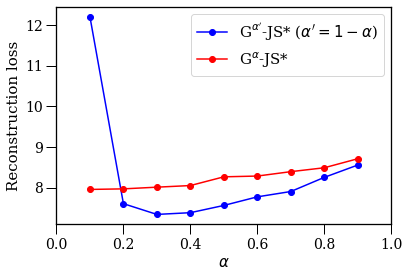

In [10]:
plt.plot(alphas, test_recon1, 'bo-', label=r"G$^{\alpha'}$-JS* ($\alpha'=1-\alpha$)")
plt.plot(alphas, test_recon2, 'ro-', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Reconstruction loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_alpha_losses.pdf'), bbox_inches='tight')